# Machine Learning results for rough nano surfaces. 

# UNDER CONSTRUCTION NOTEBOOK!!!!!!!!!!!!!!!!!!!!!!!!!!!

# NOT FINISHED YET!

#### Here are we are training our ML models to predict the active area based on some popular ISO parameters that characterise the strucural parameres of a surface.

#### We use Linear models, Random forests, Neural Networks and Deep Neural Networks.

#### Take a look at the code and the steps we have taken!


In [9]:
#import libraries part 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline

## Data import and decription

In [10]:
df1 = pd.read_csv("Dataset v1.csv")
heldout=pd.read_csv("heldout.csv")
df2= pd.read_csv("Dataset v2.csv")
df3= pd.read_csv("Dataset v3.csv")
df4= pd.read_csv("Dataset v4.csv")
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import KFold


# define a quick function for mean relative absolute error
def mean_relative_absolute_error(y_true, y_pred):
    x=sum(np.abs((y_true - y_pred)) / y_true ) /len(y_true)
    return x

#### Dataset v3

Contains simulated correlated and non correlated surfaces with specific ranges of rms, Sk, Ku and the target value Active Area

In [11]:
df33=df3[['Rms','clx','cly','Skewness','Kurtosis','Area']]

In [12]:
df3[['Rms','clx','cly','Skewness','Kurtosis','Area']].sample(5)

,Rms,clx,cly,Skewness,Kurtosis,Area
745,0.047295,0.16719,0.21123,-1.46670,6.6443,76.070
2968,0.035655,0.09575,0.18712,0.57242,1.6337,78.556
322,0.008042,0.09478,0.19494,0.46294,1.6621,64.988
2663,0.056260,0.15720,0.29292,-2.02780,8.6188,77.785
823,0.040745,0.18553,0.33289,0.78703,7.8576,70.904


In [13]:
df33.drop([2891],inplace=True)

y1=df33['Area']
X1=df33[['Rms','clx','cly','Skewness','Kurtosis']]

In [14]:
df33.describe()

,Rms,clx,cly,Skewness,Kurtosis,Area
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000
mean,0.031818,0.215624,0.214187,0.024124,5.513888,72.456063
std,0.016403,0.088406,0.088364,1.137891,2.306104,8.739961
min,0.004013,0.054494,0.049875,-2.747300,1.497900,64.035000
25%,0.017517,0.139360,0.138540,-0.824070,3.565300,65.887000
50%,0.031769,0.216820,0.213680,0.025149,5.470800,69.877000
75%,0.046358,0.289080,0.287300,0.844740,7.536100,75.456000
max,0.060049,0.465580,0.435600,2.724300,9.560700,117.950000


#### Dataset v4

Contains simulated correlated and non correlated surfaces with specific ranges of rms, Sk, Ku and the target value Active Area. 

Compared to the v3, this dataset contains more instances and differnt distinct combinations of values that we would like to test.

In [15]:
y1_held=heldout['Area']
X1_held=heldout[['Rms','clx','cly','Skewness','Kurtosis']]

In [16]:
heldout[['Rms','clx','cly','Skewness','Kurtosis','Area']].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area
count,15288.000000,15288.000000,15288.000000,15288.000000,15288.000000,15288.000000
mean,0.029002,0.210099,0.210005,-0.081806,5.382781,73.232645
std,0.017080,0.100984,0.101117,1.130900,1.975513,10.775388
min,0.003973,0.046519,0.046790,-2.369700,1.488700,64.026000
25%,0.014001,0.115830,0.115950,-0.949343,3.508200,65.359000
50%,0.028975,0.211295,0.210665,-0.054045,5.504200,69.253500
75%,0.044004,0.294695,0.294980,0.798845,7.464000,76.840250
max,0.054360,0.474560,0.500690,2.166300,7.614100,131.250000


# Datasets overview

### Our training dataset overview

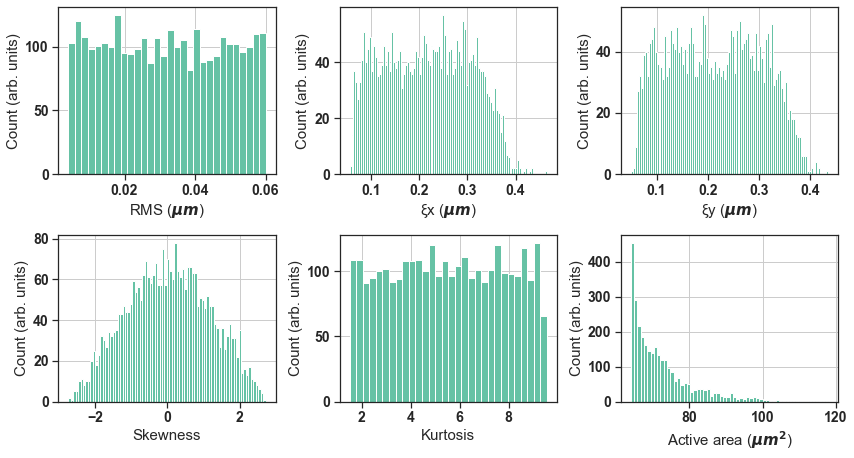

In [9]:
f = plt.figure(figsize=(12,9))
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 40}

plt.rc('font', **font)
sns.set(style="ticks", palette="Set2" )
ax = f.add_subplot(331 )
ax = df33['Rms'].hist(bins=30)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('RMS ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('RMS',fontsize=10)

ax2 = f.add_subplot(332)

ax2 =  df33['clx'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξx ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax3 = f.add_subplot(333)

ax3 =  df33['cly'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξy ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax4 = f.add_subplot(334)


ax4 =  df33['Skewness'].hist(bins=80)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Skewness',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax5 = f.add_subplot(335)

ax5 =  df33['Kurtosis'].hist(bins=30)

plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Kurtosis',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax6 = f.add_subplot(336)

ax6 =  df33['Area'].hist(bins=60)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Active area ($μm^2$)',fontsize=15)


#plt.title('Linear regression (Train size= 610)',fontsize=10)
f.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=14)

### Out Testing dataset overview

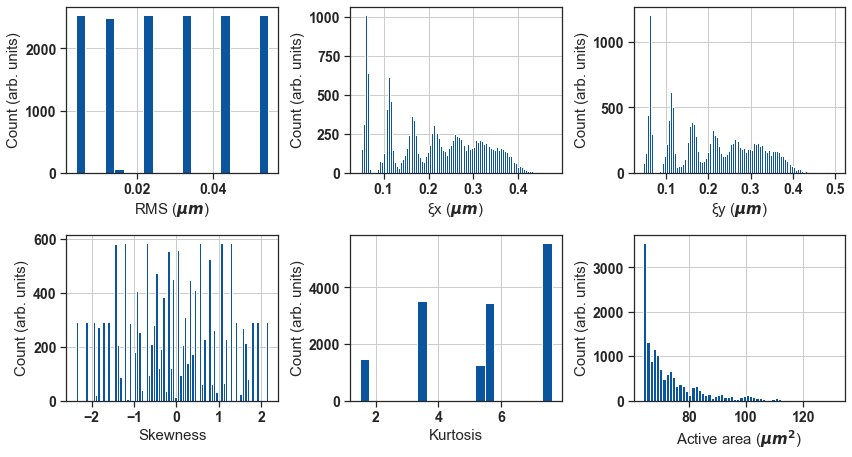

In [17]:
f = plt.figure(figsize=(12,9))
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 27}

plt.rc('font', **font)
sns.set(style="ticks", palette="Blues_r" )
ax = f.add_subplot(331 )
ax = heldout['Rms'].hist(bins=20)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('RMS ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('RMS',fontsize=10)

ax2 = f.add_subplot(332)

ax2 =  heldout['clx'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξx ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax3 = f.add_subplot(333)

ax3 =  heldout['cly'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξy ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax4 = f.add_subplot(334)


ax4 =  heldout['Skewness'].hist(bins=80)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Skewness',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax5 = f.add_subplot(335)

ax5 =  heldout['Kurtosis'].hist(bins=20)

plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Kurtosis',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax6 = f.add_subplot(336)

ax6 =  heldout['Area'].hist(bins=60)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Active area ($μm^2$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
#plt.rc('xtick', labelsize=35) 
#plt.rc('ytick', labelsize=35) 
f.tight_layout()
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=15)
#plt.rcParams['xtick.major.size'] = 20
#plt.rcParams['xtick.major.width'] = 5
#plt.rcParams['ytick.minor.size'] = 20
#plt.rcParams['ytick.minor.width'] = 5

# Modeling

## Linear Regression

In [18]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(80,81,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_new5 = pd.DataFrame(lst2, columns=cols)
df_new5


80


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,80,610,9.526917,0.087167,0.052245,0.000783,0.840857,0.000524


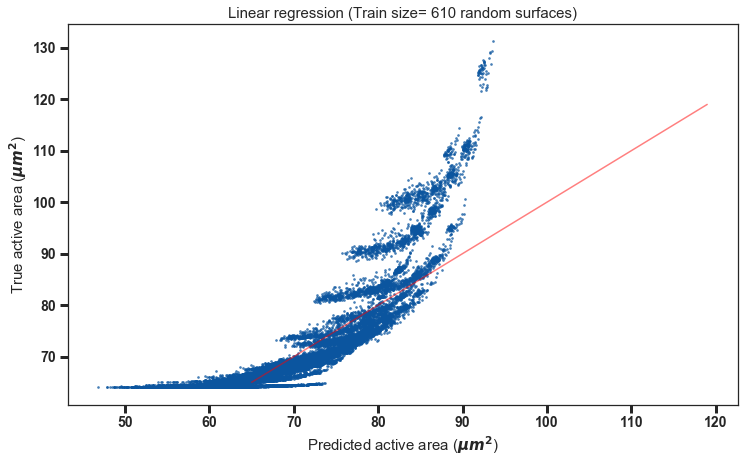

In [19]:
plt.figure(figsize=(12,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Linear regression (Train size= 610 random surfaces)',fontsize=15)
plt.tick_params(direction='out', length=8, width=3,
                grid_alpha=0.5,labelsize=14)
plt.show()

## In the predicted vs True active area, we can observe that some points are not very well predicted. 

#### In the next cells we are going to separate those points and check what features describe them.

let's start with the predicted areas of low values.

In [25]:
heldout[['Rms','clx','cly','Skewness','Kurtosis','Area']][heldout['Area']<66].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area
count,4583.000000,4583.000000,4583.000000,4583.000000,4583.000000,4583.000000
mean,0.009453,0.235820,0.235599,-0.061857,5.426702,64.628028
std,0.006738,0.097421,0.097284,1.112552,1.944523,0.594624
min,0.003973,0.048137,0.048002,-2.369700,1.488700,64.026000
25%,0.003999,0.160815,0.160465,-0.946220,3.508850,64.116000
50%,0.004009,0.243680,0.244200,-0.050657,5.507700,64.396000
75%,0.014004,0.316750,0.314925,0.798835,7.466700,65.050000
max,0.034040,0.474560,0.500690,2.164100,7.614100,65.998000


We see that  Skewness and Kurtosis have the bigest std while clx cly and Rms do not.

We can expect that in this range of active areas the high non-linear relationship of those features cannot be captured by our linear model (obviously)
Same can be expected for the Clx and Cly but for high Rms values.

(you can check it for your self)

### We can also separate the ponts using a clustering method. Here we use DBSCAN

#### For more info check out (a.k.a I google it for you xP ):


* What is DBScan? [Youtube link](https://www.youtube.com/watch?v=_A9Tq6mGtLI&t=1s)

* Documentation of DBscan: [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [23]:
from sklearn.cluster import DBSCAN
XY=np.vstack((pre,y1_held.values)).T
db = DBSCAN(eps=0.7, min_samples=7).fit(XY)
#db.labels_ gives an array with labeled clusters as (0,1,2,3...cluster_length) -1 labeled as noise data
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
#core_samples_mask creates an array same size as db.labels_ but with False in every cell
core_samples_mask[db.core_sample_indices_] = True
#core points are True (noise and reachable points are False) (might want to change that...)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(XY, labels))

Estimated number of clusters: 8


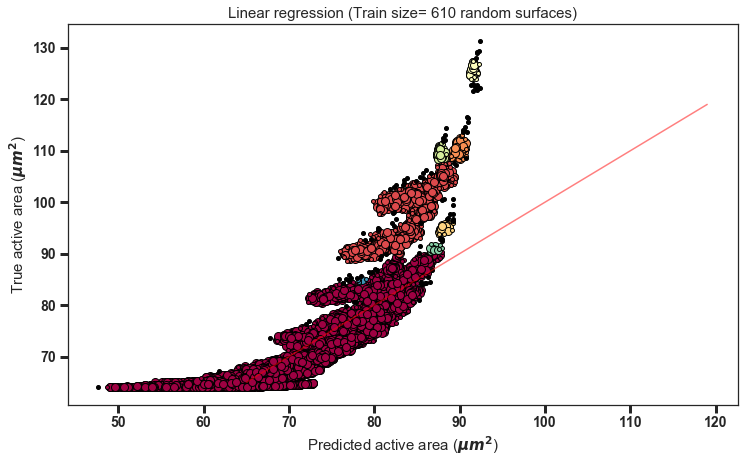

In [24]:
# Black removed and is used for noise instead.
plt.figure(figsize=(12,7))
unique_labels = set(labels) #builds an ordered collection (set) of unique elements
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))] # different pallete of colors in lists example: [(0.66, 0.003, 0.2, 1.
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = [0, 0, 0, 1]                                         # Black used for noise.

    class_member_mask = (labels == k)

    xyy = XY[class_member_mask & core_samples_mask]
    
    plt.plot(xyy[:, 0], xyy[:, 1], 'o', markerfacecolor=tuple(col), # large size for the core points
             markeredgecolor='k', markersize=8)

    xyy = XY[class_member_mask & ~core_samples_mask]
    
    plt.plot(xyy[:, 0], xyy[:, 1], 'o', markerfacecolor=tuple(col), # small size for the reachable points
             markeredgecolor='k', markersize=4)

x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Linear regression (Train size= 610 random surfaces)',fontsize=15)
plt.tick_params(direction='out', length=8, width=3,
                grid_alpha=0.5,labelsize=14)
plt.show()

In [25]:
dfclust=heldout[['Rms','clx','cly','Skewness','Kurtosis','Area']]

In [26]:
dfclust['labels']=db.labels_

From the diffferent clustered labels we can get information about the population of points we have given bad predictions (larget error).
So what characteristics do those values we predict have?

We use again the describe function to find out:

In [27]:
#second largest cluster
dfclust[dfclust['labels']==1].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area,labels
count,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.0
mean,0.047744,0.145806,0.144260,-0.077865,5.459544,97.116297,1.0
std,0.005780,0.103923,0.102667,1.136506,1.911713,5.064323,0.0
min,0.033830,0.048097,0.047715,-2.362600,1.492700,88.493000,1.0
25%,0.043984,0.062383,0.062451,-0.952020,3.512800,92.085500,1.0
50%,0.044088,0.066291,0.066045,-0.052858,5.511600,97.943000,1.0
75%,0.053985,0.232315,0.218820,0.801695,7.463150,101.260000,1.0
max,0.054324,0.392210,0.391280,2.158800,7.613600,107.860000,1.0


In [28]:
#Largest cluster
dfclust[dfclust['labels']==0].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area,labels
count,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.0
mean,0.026862,0.218450,0.218324,-0.080107,5.394388,70.381847,0.0
std,0.016542,0.097803,0.098016,1.131347,1.968451,6.271828,0.0
min,0.003973,0.046752,0.047043,-2.369700,1.488700,64.027000,0.0
25%,0.013993,0.131462,0.131020,-0.949178,3.508500,65.053000,0.0
50%,0.024021,0.217385,0.216715,-0.053477,5.504700,68.452500,0.0
75%,0.043920,0.300343,0.300403,0.798907,7.464575,73.924250,0.0
max,0.054360,0.474560,0.500690,2.166300,7.614100,90.310000,0.0


**Explanation** : For high values of areas we see that the error increanses. Skewness and Kurtosis do not have many differences in those two populations of clusters. However, clx and cly (correlations) are different. Specifically, the correlation lengths are lower in the cluster 1 compare to cluster 0. Also we have a but higher the Rms values. So, for high Rms and low clx the system show non-linear effects. (basically RMS alone can not explain the Area)
    
**Conclusion** : Non-linear effects cannot be captured by the linear model (obiously ^^) for specific area values.

Lets contiue modeling

In [152]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,99,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_new5 = pd.DataFrame(lst2, columns=cols)
df_new5

90
91
92
93
94
95
96
97
98


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,9.501695,0.110847,0.053276,0.001638,0.840088,0.000892
1,91,274,9.542194,0.127271,0.052572,0.001434,0.840410,0.000991
2,92,244,9.646939,0.230486,0.052190,0.001422,0.839654,0.001335
3,93,213,9.582288,0.245697,0.052832,0.001894,0.839078,0.001960
4,94,183,9.553169,0.176668,0.053169,0.001941,0.839390,0.002097
5,95,152,9.730857,0.175981,0.051536,0.001550,0.839047,0.001240
6,96,122,9.702665,0.260386,0.052663,0.002262,0.837958,0.001701
7,97,91,9.785353,0.412162,0.053986,0.002784,0.835087,0.003295
8,98,61,9.846406,0.296979,0.053297,0.003099,0.832953,0.005028


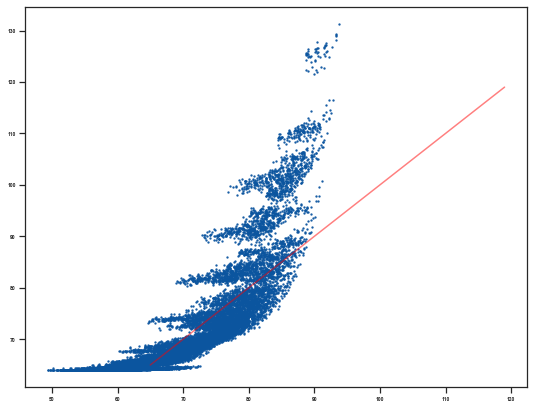

In [153]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.8,s=2)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.show()

error traveler plot

In [20]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_reg1 = pd.DataFrame(lst2, columns=cols)
df_reg1

30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,30,2137,9.517829,0.033225,0.051926,0.000293,0.841376,0.000100
1,40,1831,9.518779,0.041176,0.051951,0.000317,0.841289,0.000189
2,50,1526,9.516456,0.051357,0.051958,0.000598,0.841287,0.000192
3,60,1221,9.535007,0.056439,0.051945,0.000489,0.841156,0.000168
4,70,915,9.534110,0.066446,0.052176,0.000796,0.841019,0.000477
5,80,610,9.518922,0.109791,0.052235,0.000924,0.840888,0.000470
6,90,305,9.571520,0.149891,0.052622,0.001997,0.840208,0.000742
7,92,244,9.592817,0.227802,0.052937,0.001809,0.839287,0.001456
8,94,183,9.676418,0.204864,0.052264,0.002076,0.838959,0.001539
9,96,122,9.767719,0.317347,0.053405,0.003461,0.836477,0.003669


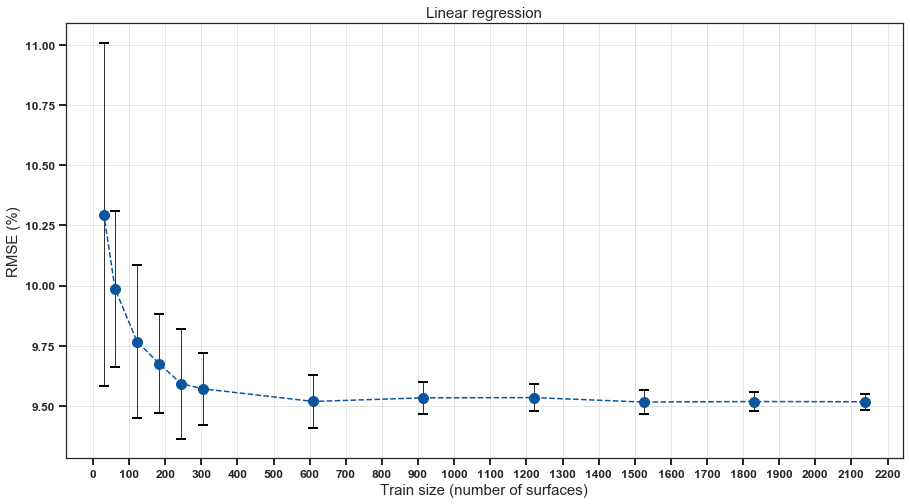

In [21]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10)
#ax1.legend(['neural network RMSE'],loc=2)
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15,)
# now, the second axes that shares the x-axis with the ax1
tick_spacing = 100
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Linear regression',fontsize=15)
#legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)
show()

It appears the RMSE reached a plateau for high training sizes

Next:

* Which parameters where the most important?

* We are going to use other models to capture the non-linearity

Which parameters are most important?

Here we are checking the beta coefficients to get a feeling of the most imporatnt values the linear regression thought are the best

In [37]:

#xlabels = boston.feature_names[which_betas]
#stats.summary(regr,X_train, y_train, xlabels)
coeff_df = pd.DataFrame(regr.coef_,X_train.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Rms,429.934479
clx,-27.334293
cly,-29.811983
Skewness,0.313006
Kurtosis,-0.287898


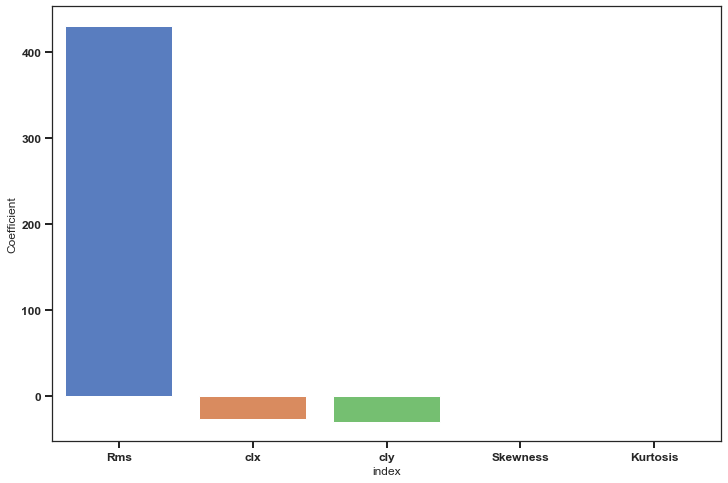

In [38]:
plt.figure(figsize=(12,8))
sns.barplot('index', y='Coefficient', data=coeff_df.reset_index(),palette = 'muted')
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)


## Random Forest

Random forests can capture the non-learn effects but also reduce the risk of overfitting. Of course when we feed the 99% of our data we still have a high risk

In [30]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [1]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=14,min_samples_leaf=8,random_state=0,n_estimators=25)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for1 = pd.DataFrame(lst2, columns=cols)
df_for1

1


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,1,3022,3.473836,0.101971,0.012986,0.000413,0.985404,0.00065


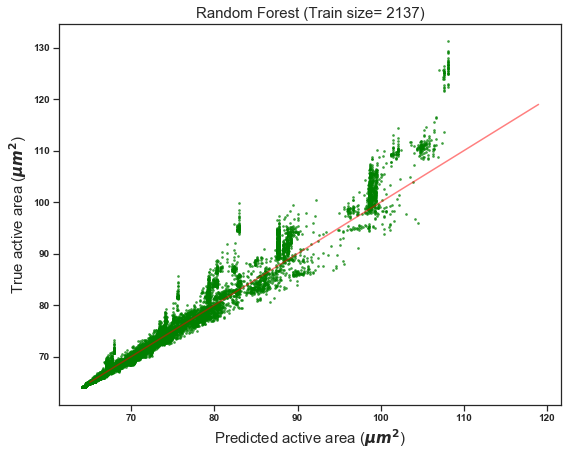

In [31]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3,color='green')
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Random Forest (Train size= 2137)',fontsize=15)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [1,5,10,20,30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=14,min_samples_leaf=8,random_state=0,n_estimators=25)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for1 = pd.DataFrame(lst2, columns=cols)
df_for1

1
5
10
20
30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,1,3022,3.448732,0.100979,0.012876,0.000429,0.985573,0.000645
1,5,2900,3.524336,0.113456,0.013215,0.000441,0.984768,0.000976
2,10,2747,3.504580,0.102111,0.013259,0.000361,0.984873,0.000856
3,20,2442,3.659258,0.125536,0.013834,0.000517,0.983138,0.001092
4,30,2137,3.970369,0.187326,0.015036,0.000566,0.980343,0.001690
5,40,1831,4.049424,0.263076,0.015651,0.000819,0.979540,0.002005
6,50,1526,4.379025,0.258794,0.016899,0.000748,0.976408,0.002794
7,60,1221,4.794386,0.354054,0.018559,0.001104,0.970797,0.003423
8,70,915,5.102817,0.239555,0.019900,0.000841,0.966339,0.003235
9,80,610,5.976233,0.420424,0.023625,0.001351,0.953889,0.008202


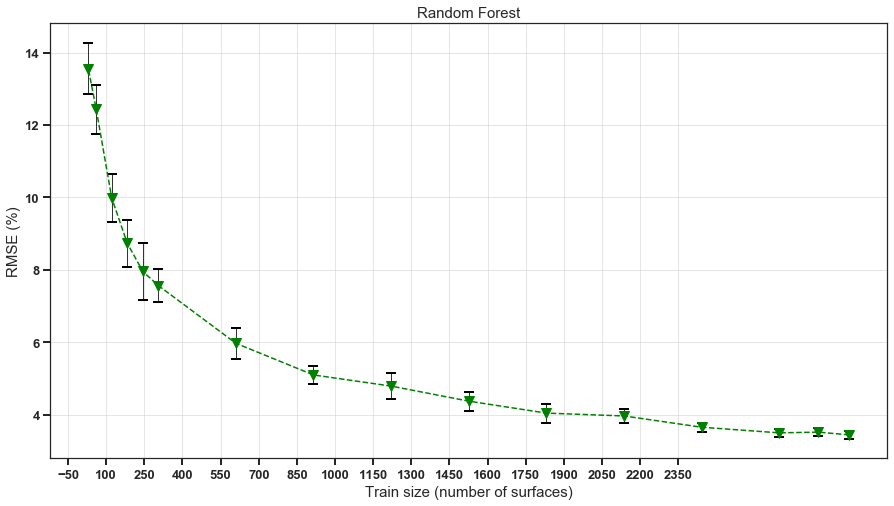

In [33]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker


# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green')
#ax1.legend(['mean_RMSE_percentage'],loc=2)
#ax1.legend_.remove()
# now, the second axes that shares the x-axis with the ax1
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#line2 = ax2.errorbar(df_new5 ['Train_size'],df_new5 ['mean_relative_absolute_error'], yerr=df_new5 ['std_mean_relative_absolute_error'],ecolor='black',fmt='xr-',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax2.legend(["mean_rel_absolute_error"],loc=1)
#ylabel('mean_rel_absolute_error')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
# now, the second axes that shares the x-axis with the ax1
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Random Forest',fontsize=15)


plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

plt.xticks(np.arange(-50, 2400, 150))
show()

In [35]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=9,min_samples_leaf=3,random_state=0)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for2 = pd.DataFrame(lst2, columns=cols)
df_for2

90
91
92
93
94
95
96
97
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,5.808379,0.631740,0.022911,0.001630,0.958895,0.007444
1,91,274,5.955042,0.667230,0.023554,0.001855,0.958209,0.010003
2,92,244,6.387865,0.505688,0.025318,0.001304,0.951476,0.009558
3,93,213,6.347803,0.650200,0.025794,0.001828,0.951235,0.008952
4,94,183,7.058960,0.479517,0.027783,0.001497,0.942934,0.010853
5,95,152,7.297579,0.731792,0.029779,0.002067,0.937489,0.011281
6,96,122,7.933726,1.011998,0.032961,0.002773,0.921399,0.021224
7,97,91,8.654743,0.852018,0.038030,0.003155,0.894735,0.026894
8,98,61,9.807213,1.083969,0.043837,0.003697,0.864002,0.037958
9,99,30,11.658088,0.920955,0.056224,0.004070,0.778826,0.041712


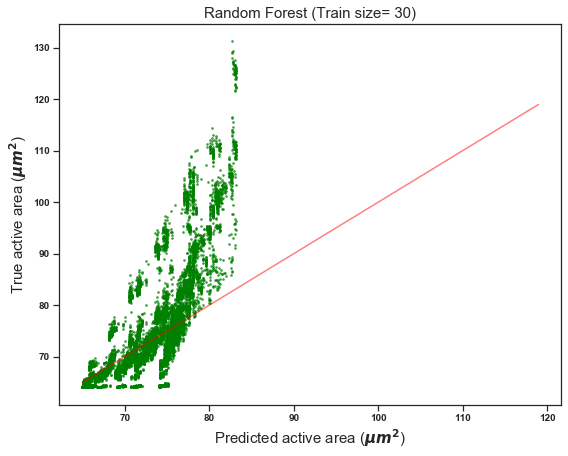

In [36]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3,color='green')
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Random Forest (Train size= 30)',fontsize=15)
plt.show()

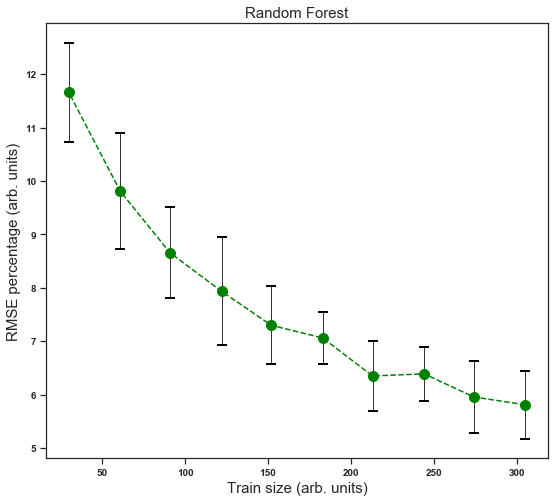

In [37]:
from pylab import figure, show, legend, ylabel
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.errorbar(df_for2 ['Train_size'],df_for2 ['mean_Final_RMSE'], yerr=df_for2 ['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green')
#ax1.legend(['mean_RMSE_percentage'],loc=2)

ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
# now, the second axes that shares the x-axis with the ax1
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#line2 = ax2.errorbar(df_new5 ['Train_size'],df_new5 ['mean_relative_absolute_error'], yerr=df_new5 ['std_mean_relative_absolute_error'],ecolor='black',fmt='xr-',capthick=2)
#ax2.yaxis.tick_right()
tick_spacing =50
#ax2.yaxis.set_label_position("right")
#ax2.legend(["mean_rel_absolute_error"],loc=1)
#ylabel('mean_rel_absolute_error')
plt.title('Random Forest',fontsize=15)


ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
show()

## Random forest vs Linear Regression

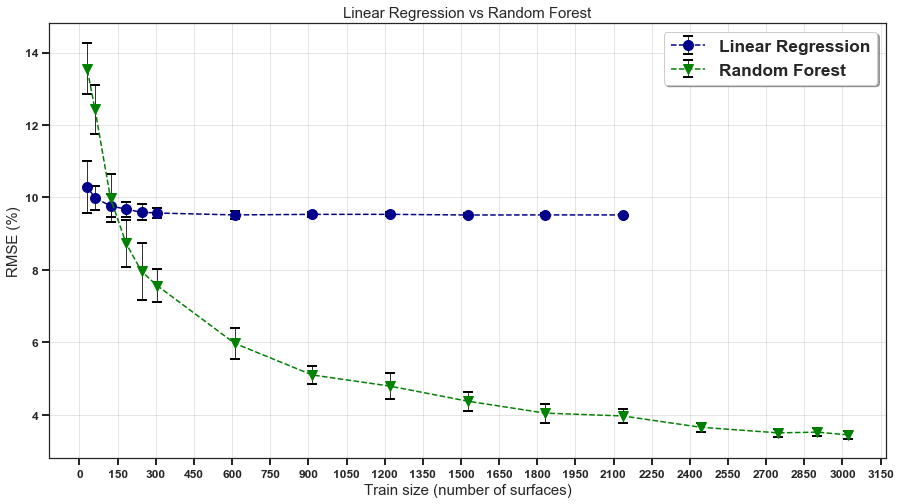

In [39]:
from pylab import figure, show, legend, ylabel
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='darkblue',label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest',fontsize=15)

tick_spacing =150
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')

#ax1.set_yscale("log", nonposy='clip')
plt.grid(True)
show()

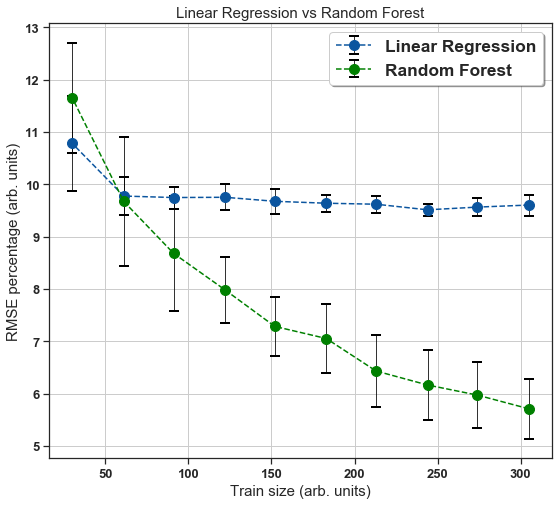

In [90]:
from pylab import figure, show, legend, ylabel
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg2['Train_size'],df_reg2['mean_Final_RMSE'], yerr=df_reg2['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8,color='darkblue', markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for2 ['Train_size'],df_for2 ['mean_Final_RMSE'], yerr=df_for2 ['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
plt.title('Linear Regression vs Random Forest',fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=13)
tick_spacing =50
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')

#ax1.set_yscale("log", nonposy='clip')
plt.grid(True)
show()

## Neural networks

Here we try also to use neural networks. In the beggining we try complex and later of we try with deep ones!

Keep in mind the next cell will take some time to run!

You can relize the time difference between the random forest and the linear regression. (Will it however add value back?-> reduce the prediciton error)

In [27]:
# more complicated neural net!
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        mlpred=MLPRegressor(random_state=25,hidden_layer_sizes=(15,25,40,25,15),batch_size=20,activation='relu')
        mlpred.fit(X_train, y_train)
        pre= mlpred.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_net3 = pd.DataFrame(lst2, columns=cols)
df_net3

30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,30,2137,5.760225,1.728812,0.028509,0.008043,0.948645,0.023106
1,40,1831,4.869290,1.589195,0.025059,0.006784,0.962891,0.023583
2,50,1526,5.933999,1.521522,0.030042,0.006745,0.944396,0.021274
3,60,1221,6.115549,1.516710,0.031374,0.007149,0.939398,0.028391
4,70,915,6.917936,0.410420,0.035533,0.001844,0.924995,0.004057
5,80,610,7.467372,0.838425,0.040056,0.005503,0.910406,0.016391
6,90,305,9.840743,0.792167,0.052568,0.006509,0.839364,0.026815
7,92,244,11.071472,0.658117,0.060503,0.004136,0.789694,0.021408
8,94,183,12.551075,0.537590,0.068612,0.004002,0.730893,0.017611
9,96,122,14.485338,0.832154,0.081151,0.006115,0.616010,0.084133


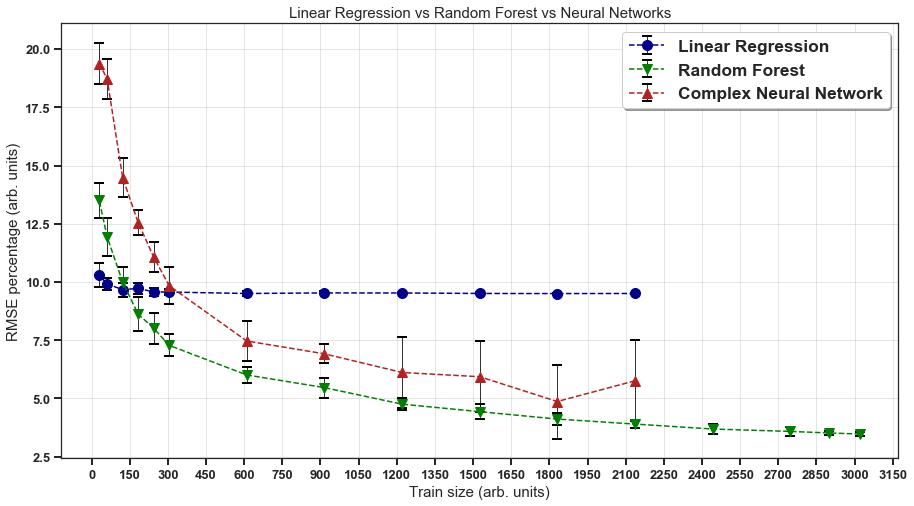

In [28]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='darkblue',label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'],df_net1['mean_Final_RMSE'], yerr=df_net1['std_final_rmse'],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Complex Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 100

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
plt.grid(True) 
show()

In [163]:
# more complicated neural net!
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        mlpred=MLPRegressor(random_state=25,hidden_layer_sizes=(15,25,40,25,15),batch_size=20,activation='relu')
        mlpred.fit(X_train, y_train)
        pre= mlpred.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_net4 = pd.DataFrame(lst2, columns=cols)
df_net4

90
91
92
93
94
95
96
97
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,9.838998,0.688743,0.051898,0.005883,0.837662,0.027937
1,91,274,10.377080,0.672920,0.056356,0.006257,0.816393,0.028609
2,92,244,10.944543,0.641672,0.059993,0.004453,0.791768,0.030163
3,93,213,11.625078,0.955761,0.064226,0.005287,0.765312,0.024225
4,94,183,12.438505,0.621782,0.067339,0.004740,0.740742,0.024659
5,95,152,12.618379,0.409514,0.069168,0.003605,0.717913,0.022532
6,96,122,15.165233,1.122737,0.082496,0.007658,0.553193,0.240369
7,97,91,14.972269,0.669726,0.085114,0.005119,0.569634,0.085761
8,98,61,18.497861,0.700931,0.104859,0.008196,-0.152249,0.080851
9,99,30,19.941713,1.143146,0.114668,0.007513,-0.204452,0.060658


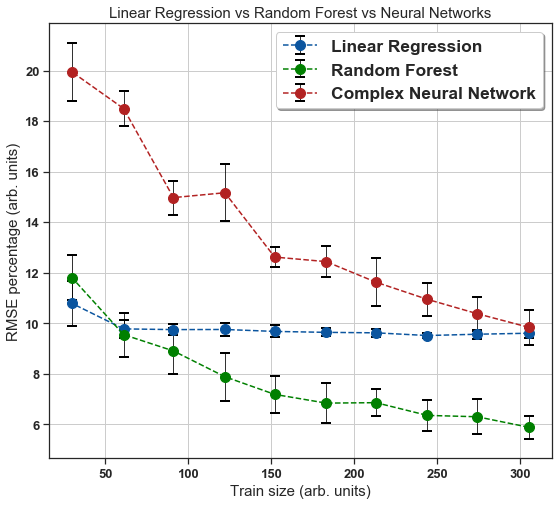

In [164]:
from pylab import figure, show, legend, ylabel
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg2['Train_size'],df_reg2['mean_Final_RMSE'], yerr=df_reg2['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for2 ['Train_size'],df_for2 ['mean_Final_RMSE'], yerr=df_for2 ['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net2['Train_size'],df_net2['mean_Final_RMSE'], yerr=df_net2['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net4['Train_size'],df_net4['mean_Final_RMSE'], yerr=df_net4['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Complex Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

tick_spacing =50
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.tick_params(axis='both', which='major', labelsize=13)
legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')

#ax1.set_yscale("log", nonposy='clip')
plt.grid(True)
show()

# Deep Neural Network

In [ ]:
import keras
from keras.layers import *

In [168]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in [70,80,90,92,94,96,98,99,99.5]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,8,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X1)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y1, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

70
80
90
92
94
96
98
99
99.5


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,70.0,915,3.363420,1.305292,2.412939,0.839104
1,80.0,610,3.284616,0.565132,2.486858,0.482483
2,90.0,305,3.645668,2.384730,2.683675,1.718034
3,92.0,244,3.255630,0.779145,2.396986,0.598674
4,94.0,183,2.575183,0.687343,1.814815,0.465709
5,96.0,122,2.769328,0.243204,1.854594,0.088270
6,98.0,61,3.388381,1.426659,2.357885,0.908454
7,99.0,30,2.635859,0.366161,1.956840,0.491433
8,99.5,15,3.116972,0.422492,2.406877,0.450068


In [173]:
plt.figure(figsize=(9,7))
df_net5

,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,70.0,915,3.363420,1.305292,2.412939,0.839104
1,80.0,610,3.284616,0.565132,2.486858,0.482483
2,90.0,305,3.645668,2.384730,2.683675,1.718034
3,92.0,244,3.255630,0.779145,2.396986,0.598674
4,94.0,183,2.575183,0.687343,1.814815,0.465709
5,96.0,122,2.769328,0.243204,1.854594,0.088270
6,98.0,61,3.388381,1.426659,2.357885,0.908454
7,99.0,30,2.635859,0.366161,1.956840,0.491433
8,99.5,15,3.116972,0.422492,2.406877,0.450068


In [ ]:
train_error = []

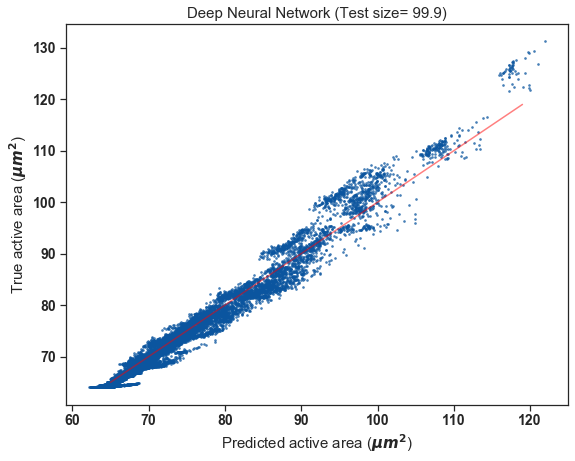

In [191]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Deep Neural Network (Test size= 99.9)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [33]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in  [1,5,10,20,30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,8,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X_train, y_train,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X_train)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y_train, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

1
5
10
20
30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,1,3022,3.402778,1.266269,2.440581,0.923902
1,5,2900,3.301215,1.108315,2.335835,0.819709
2,10,2747,3.060047,0.585516,2.161267,0.431564
3,20,2442,4.763102,1.742225,3.213013,1.072939
4,30,2137,3.680843,1.259725,2.517917,0.822541
5,40,1831,3.812266,1.206837,3.155938,1.371148
6,50,1526,5.054008,1.641874,3.214943,0.961674
7,60,1221,5.761788,1.893726,3.997221,1.293608
8,70,915,7.382709,1.772203,5.146403,0.968620
9,80,610,7.272099,2.402085,5.454052,2.129772


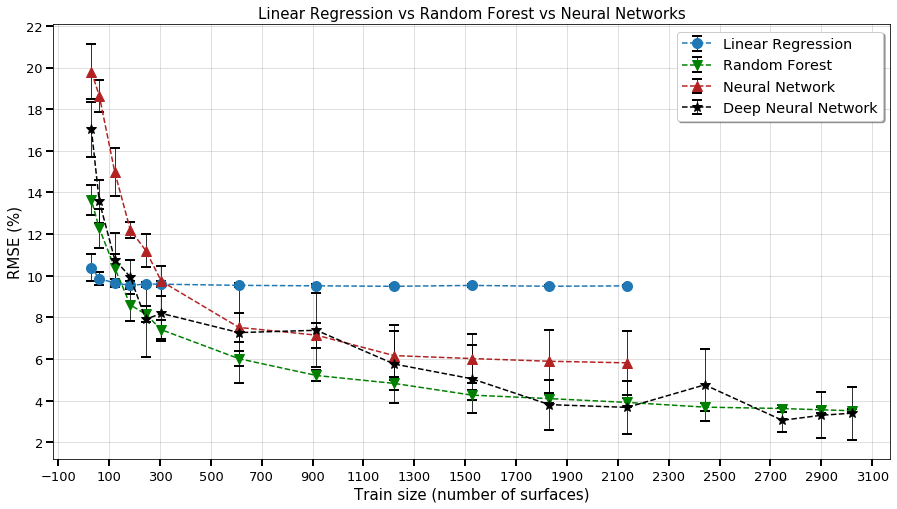

In [39]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'][:-1],df_net1['mean_Final_RMSE'][:-1], yerr=df_net1['std_final_rmse'][:-1],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Neural Network')
ax1.errorbar(df_net5['Train_size'],df_net5['mean_Final_RMSE'], yerr=df_net5['std_final_rmse'],ecolor='black',fmt='--*',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='black',label='Deep Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 200

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid(True) 
plt.xticks(np.arange(-100, 3200, 200))
#ax1.set_yscale("log", nonposy='clip')
show()

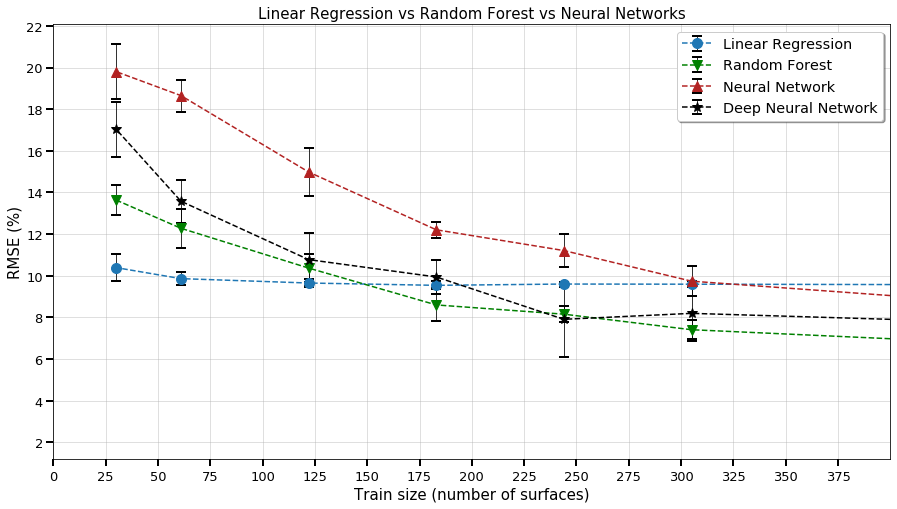

In [49]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'][:-1],df_net1['mean_Final_RMSE'][:-1], yerr=df_net1['std_final_rmse'][:-1],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Neural Network')
ax1.errorbar(df_net5['Train_size'],df_net5['mean_Final_RMSE'], yerr=df_net5['std_final_rmse'],ecolor='black',fmt='--*',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='black',label='Deep Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 200

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid(True) 
plt.xticks(np.arange(0, 400, 25))
plt.xlim(0, 400)
#ax1.set_yscale("log", nonposy='clip')
show()

In [50]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in  [10,20,30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,10,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(200))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(200))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X_train, y_train,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X_train)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y_train, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

10
20
30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,10,2747,2.646031,0.583102,1.984501,0.503766
1,20,2442,2.967273,0.554407,2.356162,0.734702
2,30,2137,3.022868,0.569683,2.299647,0.531961
3,40,1831,3.443071,1.002928,2.601242,0.710295
4,50,1526,4.148933,1.434084,2.806511,0.934935
5,60,1221,4.479361,1.829885,3.192867,1.204843
6,70,915,4.641277,1.541455,3.247634,1.098822
7,80,610,7.638078,2.480643,5.904296,1.895486
8,90,305,7.851751,2.154661,5.181689,1.579153
9,92,244,10.156490,1.147489,7.549814,0.482656


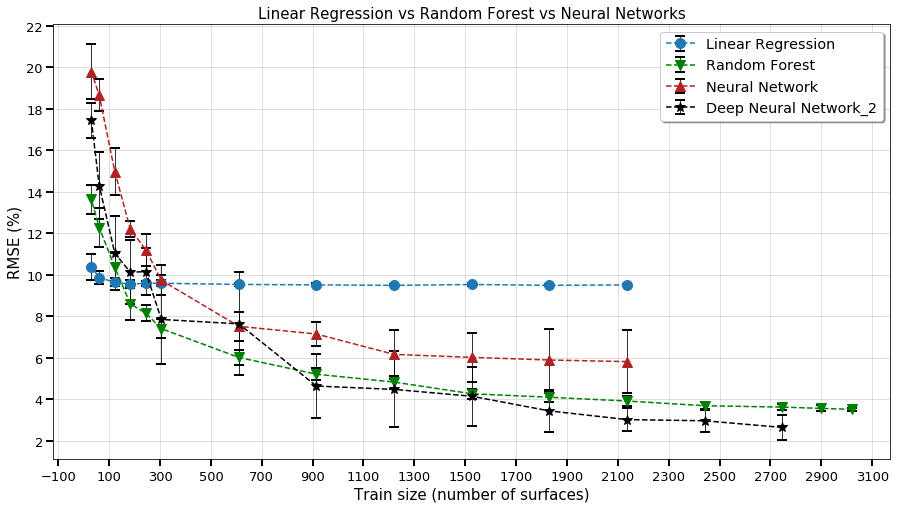

In [51]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'][:-1],df_net1['mean_Final_RMSE'][:-1], yerr=df_net1['std_final_rmse'][:-1],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Neural Network')
ax1.errorbar(df_net5['Train_size'],df_net5['mean_Final_RMSE'], yerr=df_net5['std_final_rmse'],ecolor='black',fmt='--*',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='black',label='Deep Neural Network_2')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 200

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid(True) 
plt.xticks(np.arange(-100, 3200, 200))
#ax1.set_yscale("log", nonposy='clip')
show()

In [57]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in  [10]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,2,1):
        rand=random.randint(5, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(200))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(200))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X_train, y_train,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X_train)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y_train, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

10


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,10,2747,1.991997,0.0,1.339864,0.0


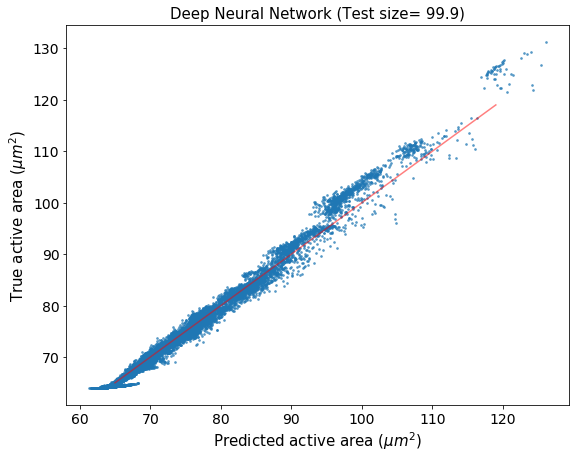

In [58]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Deep Neural Network (Test size= 99.9)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

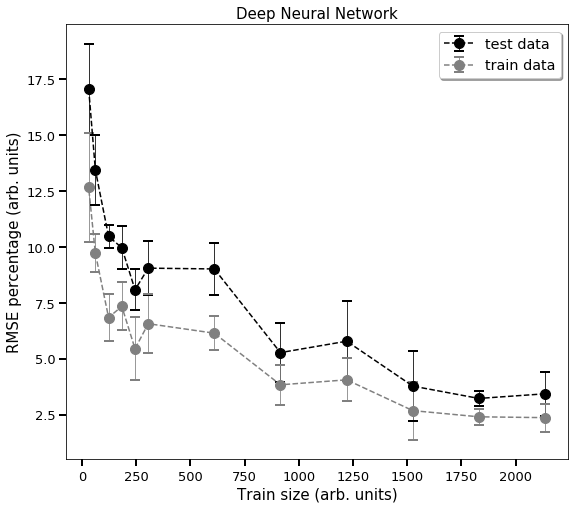

In [19]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_net5['Train_size'],df_net5['mean_Final_RMSE'], yerr=df_net5['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='black',label = 'test data')
ax1.errorbar(df_net5['Train_size'],df_net5['mean_train_RMSE'], yerr=df_net5['std_train_rmse'],ecolor='grey',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='grey',label = 'train data')

#ax1.legend(['neural network RMSE'],loc=2)
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
# now, the second axes that shares the x-axis with the ax1
tick_spacing = 250
legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Deep Neural Network',fontsize=15)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)
#legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
show()

In [184]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in [70,80,90,92,94,96,98,99,99.5]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,8,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=400,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X1)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y1, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net6 = pd.DataFrame(lst2, columns=cols)
df_net6

70
80
90
92
94
96
98
99
99.5


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,70.0,915,4.652070,1.646264,3.314887,1.296062
1,80.0,610,4.576186,0.957780,3.411923,1.044073
2,90.0,305,5.807881,2.334498,4.082600,1.428725
3,92.0,244,4.666332,1.530155,3.754790,1.373162
4,94.0,183,5.723275,2.918403,4.084791,2.078803
5,96.0,122,5.133385,1.779492,3.278604,1.096280
6,98.0,61,4.176850,1.200975,3.545742,1.493207
7,99.0,30,4.889426,1.587472,3.629572,1.311660
8,99.5,15,4.488142,2.032087,3.683982,1.497210


In [15]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse']
lst2=[]

for test_s in range(99,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(9,10,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100])
df_net6 = pd.DataFrame(lst2, columns=cols)
df_net6

99


KeyboardInterrupt: 

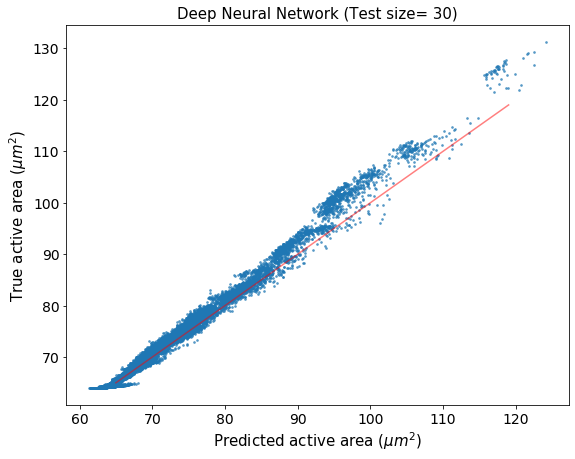

In [12]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Deep Neural Network (Test size= 30)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [16]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in [99,99.2,99.4,99.6,99.8,99.9]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,10,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X1)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y1, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

99
99.2
99.4
99.6
99.8
99.9


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,99.0,30,4.163429,1.842635,2.986160,1.181539
1,99.2,24,3.537621,1.357604,2.693368,0.766774
2,99.4,18,3.872095,1.806104,2.834036,1.056222
3,99.6,12,2.983534,0.748196,2.507293,0.897502
4,99.8,6,4.425235,2.829533,3.209138,1.995616
5,99.9,3,2.975951,1.283965,2.212552,1.019897


In [113]:

#TESTING FAILURE OF DEEP NEURAL NETWORK

cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse']
lst2=[]
rand=0
for test_s in range(90,99.9,0.1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,1,1):
        rand= rand+1
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100])
df_net7 = pd.DataFrame(lst2, columns=cols)
df_net7

94


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse
0,94,610,NaN,NaN


In [119]:
for layer in net1Model.layers:
    weights = layer.get_weights()

In [120]:
coeff_df=pd.DataFrame(net1Model.layers[0].get_weights()[0])

In [121]:
coeff_df

,0,1,2,3,4,5,6,7,8,9
0,4.479012,-0.500201,4.451200,-0.553584,4.302739,5.688436,4.608456,-5.604764,-4.885773,0.428184
1,-2.471640,-0.578177,0.097956,-0.572158,-1.064451,-0.455851,-0.012258,-0.118495,0.052921,-0.440652
2,0.066363,0.532960,-2.512512,0.630504,-0.024093,-0.503108,-1.214421,-0.113857,-0.027813,-1.104923
3,-0.000081,0.387494,-0.004728,-0.320880,0.000179,0.045730,0.003064,0.070354,-0.013780,0.452181
4,-0.000510,-0.330988,-0.002620,-0.491774,-0.001279,0.125366,0.000303,0.226015,0.017242,-0.046460


Lets vizulize the the weights for the nodes for the first layer! We can get an understanding of the most important values

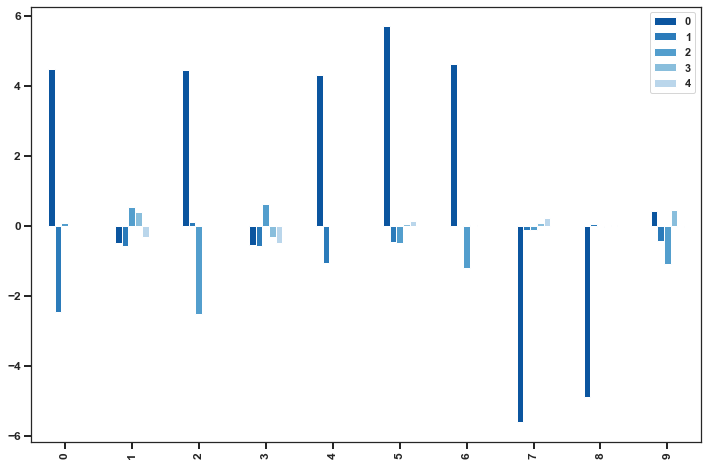

In [122]:
#df11=pd.DataFrame(coeff_df)
#df22=df11.transpose()
plt.Figure(figsize=(12,3))
coeff_df.transpose().plot.bar(figsize=(12,8))
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)

In [123]:
coeff_df.transpose().apply(abs).mean()

0    3.550235
1    0.586456
2    0.673055
3    0.129847
4    0.124256
dtype: float32

In [124]:
r=[10,-1.5,-1.6,0.2,0.4]
r_df=pd.DataFrame(r,["Rms","ξx",'ξy','Skewness','Kurtosis'])

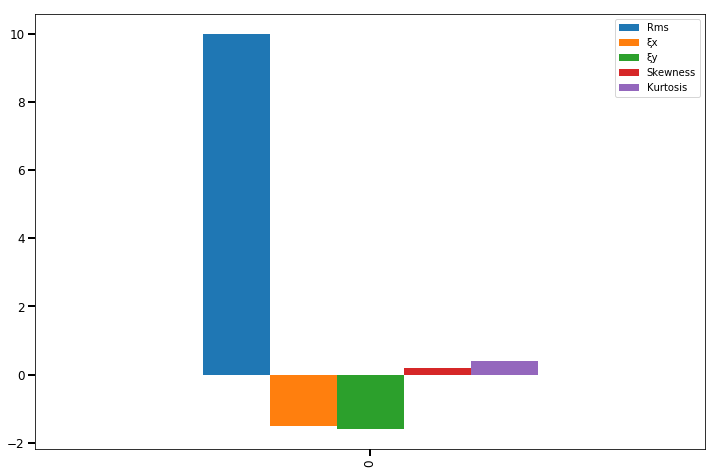

In [34]:
#df11=pd.DataFrame(coeff_df)
#df22=df11.transpose()
plt.Figure(figsize=(12,3))
r_df.transpose().plot.bar(figsize=(12,8))
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)

In [40]:
## Misc Code (Please Ignore)

In [ ]:
#1400 epifaneies
rmse1=[10,4,10.2,8,3.5]
rmse2=[10.2,10.4,36,35.5,3.6]
models=['Linear Regresion','Random Forests','Simple NN','Complex NN','Deep NN']


In [ ]:
df1_ = pd.DataFrame(rmse1,models,columns=['RMSE(%)'])
df1_

df2_ = pd.DataFrame(rmse2,models,columns=['RMSE(%)'])
df2_

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot('index', y='RMSE(%)', data=df1_.reset_index(),palette = 'muted')
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)


# Todo

* Add specific versions of the labriaries to be runned 

* Fix graphs for feature importance (NN and random forests)


# Possible next steps for you to contribute

* Imbalanced Target value: Active area is a bit imbalanced, can you treat the tranning differently to achieve better predictions? or even better achieve better predictions with less amount of data!

* Add RMSE cross validation

* scaling the data! This is a very important step in machine learning. Especially when you want to start drawing the conclusions regarding the black box.